<a href="https://colab.research.google.com/github/qTronor/BigData_lessons/blob/main/BigData_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
import time
warnings.filterwarnings('ignore')

In [ ]:
digits = datasets.load_digits()

In [ ]:
X, y = digits.images, digits.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = np.reshape(x_train, (x_train.shape[0], -1))
X_test = np.reshape(x_test, (x_test.shape[0], -1))

In [ ]:
models = []

for i in range(10):
  model = DecisionTreeClassifier()
  model.fit(X_train,y_train)
  models.append(model)

In [ ]:
models

[DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier()]

In [ ]:
y_pred = []

for i in range(len(models)):
  y_pred.append(models[i].predict(X_test))

In [ ]:
def most_common_values(list_of_lists):
    result_list = []
    if not list_of_lists:
        return result_list
    for i in range(len(list_of_lists[0])):
        current_values = [lst[i] for lst in list_of_lists]
        counts = pd.Series(current_values).value_counts()
        most_common_value = counts.idxmax()
        result_list.append(most_common_value)

    return result_list

lists = y_pred
result = most_common_values(lists)

print("Результат:", result)

Результат: [6, 9, 3, 7, 2, 1, 5, 3, 5, 7, 2, 6, 4, 0, 4, 2, 3, 7, 8, 4, 4, 3, 9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3, 6, 1, 3, 0, 6, 5, 5, 1, 8, 5, 6, 0, 3, 0, 0, 8, 5, 4, 4, 2, 4, 5, 7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4, 4, 9, 1, 2, 5, 3, 5, 2, 9, 4, 4, 7, 4, 3, 4, 3, 4, 3, 5, 9, 4, 2, 7, 7, 4, 6, 1, 9, 2, 7, 3, 3, 2, 6, 9, 4, 0, 7, 4, 7, 5, 8, 7, 5, 7, 3, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0, 6, 4, 3, 9, 3, 4, 7, 2, 9, 0, 4, 5, 8, 6, 5, 9, 9, 8, 4, 2, 1, 8, 7, 7, 2, 2, 3, 9, 8, 0, 3, 3, 2, 5, 6, 9, 9, 4, 4, 5, 4, 2, 3, 6, 4, 8, 5, 9, 5, 7, 1, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5, 2, 7, 4, 6, 4, 5, 6, 4, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 9, 1, 5, 5, 1, 4, 4, 8, 8, 9, 9, 7, 4, 2, 8, 2, 3, 5, 8, 3, 3, 6, 0, 9, 7, 7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 2, 3, 6, 5, 9, 7, 3, 5, 5, 9, 9, 8, 5, 3, 2, 2, 0, 5, 8, 3, 4, 0, 2, 4, 6, 4, 3, 4, 5, 0, 5, 2, 1, 3, 1, 4, 3, 1, 7, 0, 1, 5, 6, 1, 1, 8, 7, 0, 6, 4, 8, 8

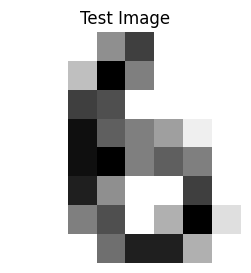

In [ ]:
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
ax.set_axis_off()
ax.imshow(x_test[0], cmap=plt.cm.gray_r, interpolation="nearest")
ax.set_title("Test Image")

plt.show()

In [ ]:
model_tree = DecisionTreeClassifier()
x = np.reshape(X, (X.shape[0], -1))

one_model = model_tree.fit(X_train, y_train)

In [ ]:
predictions = one_model.predict(X_test)

In [ ]:
for i, (res, pred, true) in enumerate(zip(result, predictions, y_test)):
    if res != true or pred != true:
        print(f"Индекс {i}: Мода - {res}, Предсказание одного дерева - {pred}, Реальное значение - {true}")

Индекс 7: Мода - 3, Предсказание одного дерева - 3, Реальное значение - 2
Индекс 9: Мода - 7, Предсказание одного дерева - 7, Реальное значение - 2
Индекс 10: Мода - 2, Предсказание одного дерева - 2, Реальное значение - 1
Индекс 11: Мода - 6, Предсказание одного дерева - 6, Реальное значение - 9
Индекс 19: Мода - 4, Предсказание одного дерева - 4, Реальное значение - 8
Индекс 41: Мода - 9, Предсказание одного дерева - 3, Реальное значение - 9
Индекс 52: Мода - 8, Предсказание одного дерева - 7, Реальное значение - 9
Индекс 56: Мода - 3, Предсказание одного дерева - 3, Реальное значение - 9
Индекс 59: Мода - 8, Предсказание одного дерева - 8, Реальное значение - 1
Индекс 60: Мода - 5, Предсказание одного дерева - 5, Реальное значение - 0
Индекс 62: Мода - 4, Предсказание одного дерева - 4, Реальное значение - 5
Индекс 89: Мода - 9, Предсказание одного дерева - 3, Реальное значение - 9
Индекс 92: Мода - 5, Предсказание одного дерева - 5, Реальное значение - 8
Индекс 94: Мода - 5, Предск

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.reshape(x_train, (x_train.shape[0], -1))
X_test = np.reshape(x_test, (x_test.shape[0], -1))

# Одно дерево
tree_clf = DecisionTreeClassifier(random_state=42)

start_time = time.time()

tree_clf.fit(X_train, y_train)

end_time = time.time()
one_tree_time = end_time - start_time

print(f"Время выполнения: {one_tree_time} секунд")

tree_predictions = tree_clf.predict(X_test)

tree_accuracy = accuracy_score(y_test, tree_predictions)
print(f"Точность дерева решений: {tree_accuracy:.2%}")

Время выполнения: 0.029001951217651367 секунд
Точность дерева решений: 84.17%


In [ ]:
# Бэггинг
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                                n_estimators=50, random_state=42)

start_time = time.time()


bagging_clf.fit(X_train, y_train)

end_time = time.time()
bagging_time = end_time - start_time

print(f"Время выполнения: {bagging_time} секунд")

bagging_predictions = bagging_clf.predict(X_test)

bagging_accuracy = accuracy_score(y_test, bagging_predictions)
print(f"Точность бэггинга: {bagging_accuracy:.2%}")

Время выполнения: 0.6012158393859863 секунд
Точность бэггинга: 95.56%


In [ ]:
print(f"Точность дерева решений: {tree_accuracy:.2%}")
print(f"Точность бэггинга: {bagging_accuracy:.2%}")

Точность дерева решений: 84.17%
Точность бэггинга: 95.56%


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [ ]:
base_classifier = DecisionTreeClassifier(max_depth=1, random_state=42)

boosting_clf = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

start_time = time.time()

boosting_clf.fit(X_train, y_train)

end_time = time.time()
execution_time = end_time - start_time

print(f"Время выполнения: {execution_time} секунд")

boosting_predictions = boosting_clf.predict(X_test)

boosting_accuracy = accuracy_score(y_test, boosting_predictions)
print(f"Точность бустинга: {boosting_accuracy:.2%}")

Время выполнения: 0.20139741897583008 секунд
Точность бустинга: 21.94%


In [ ]:
digits = datasets.load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators = 100  # количество деревьев
learning_rate = 0.1  # скорость обучения

model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)

start_time = time.time()

model.fit(X_train, y_train)

end_time = time.time()
gradientBoosting_time = end_time - start_time

print(f"Время выполнения: {gradientBoosting_time} секунд")

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Время выполнения: 12.90369462966919 секунд
Accuracy: 0.9694444444444444


In [ ]:
data = datasets.fetch_covtype()

In [ ]:
predicts = data.data
target = data.target

In [ ]:
predicts.shape

(581012, 54)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(predicts, target, train_size=0.8)

In [ ]:
x_train.shape

(464809, 54)

In [ ]:
start_time = time.time()

random_forest  = RandomForestClassifier(max_depth = 15, min_samples_split = 10).fit(x_train, y_train)


end_time = time.time()
random_forest_time = end_time - start_time

print(f"Время выполнения: {random_forest_time} секунд")

Время выполнения: 90.88443303108215 секунд


In [ ]:
y_preds = random_forest.predict(x_train)
print("F1 Мера для test", f1_score(y_preds, y_train, average='macro'))

F1 Мера для test 0.7725249875858847


In [ ]:
y_preds = random_forest.predict(x_test)
print("F1 Мера для test", f1_score(y_preds, y_test, average='macro'))

F1 Мера для test 0.742042862207338


In [ ]:
random_forest = RandomForestClassifier()

In [ ]:
params_grid = {
    "max_depth": [12,18],
    "min_samples_leaf": [3, 10],
    "min_samples_split": [6, 10],
}

grid_search_random_forest = GridSearchCV(estimator = random_forest,
                                        param_grid=params_grid,
                                        scoring = "f1_macro",
                                        cv = 4)
start_time = time.time()

grid_search_random_forest.fit(x_train, y_train)

end_time = time.time()
gridSearch_time = end_time - start_time

print(f"Время выполнения: {gridSearch_time} секунд")

Время выполнения: 1803.883356809616 секунд


In [ ]:
best_model = grid_search_random_forest.best_estimator_

In [ ]:
y_preds_d = best_model.predict(x_train)
print("F1 Мера для train", f1_score(y_preds_d, y_train, average='macro'))

F1 Мера для train 0.8377171071681838


In [ ]:
y_preds = best_model.predict(x_test)
print("F1 Мера для test", f1_score(y_preds, y_test, average='macro'))

F1 Мера для test 0.7989367141391812


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.7 MB/s eta 0:00:00


In [ ]:
import catboost as cb

In [ ]:
model_catboost_clf = cb.CatBoostClassifier(iterations = 300, task_type="GPU",
                                           devices='0')
start_time = time.time()
model_catboost_clf.fit(x_train, y_train)
end_time = time.time()
сatBoost_time = end_time - start_time

print(f"Время выполнения: {сatBoost_time} секунд")

Learning rate set to 0.5
0:	learn: 1.0168366	total: 60ms	remaining: 18s
1:	learn: 0.8576096	total: 115ms	remaining: 17.1s
2:	learn: 0.7822061	total: 172ms	remaining: 17.1s
3:	learn: 0.7299309	total: 229ms	remaining: 16.9s
4:	learn: 0.6971114	total: 287ms	remaining: 16.9s
5:	learn: 0.6735819	total: 343ms	remaining: 16.8s
6:	learn: 0.6583273	total: 403ms	remaining: 16.9s
7:	learn: 0.6472326	total: 460ms	remaining: 16.8s
8:	learn: 0.6347635	total: 508ms	remaining: 16.4s
9:	learn: 0.6232398	total: 581ms	remaining: 16.9s
10:	learn: 0.6136769	total: 651ms	remaining: 17.1s
11:	learn: 0.6046227	total: 719ms	remaining: 17.2s
12:	learn: 0.5930806	total: 796ms	remaining: 17.6s
13:	learn: 0.5846079	total: 865ms	remaining: 17.7s
14:	learn: 0.5775123	total: 939ms	remaining: 17.8s
15:	learn: 0.5697372	total: 1.02s	remaining: 18.1s
16:	learn: 0.5636034	total: 1.09s	remaining: 18.1s
17:	learn: 0.5596001	total: 1.16s	remaining: 18.1s
18:	learn: 0.5537275	total: 1.23s	remaining: 18.2s
19:	learn: 0.547178

In [ ]:
y_preds_t = model_catboost_clf.predict(x_train, task_type="CPU")
print("F1 Мера для train", f1_score(y_preds_t, y_train, average='macro'))

F1 Мера для train 0.8724891920753434


In [ ]:
y_preds = model_catboost_clf.predict(x_test, task_type="CPU")
print("F1 Мера для test", f1_score(y_preds, y_test, average='macro'))

F1 Мера для test 0.8578681890775861


In [ ]:
print("CatBoost_time = ", сatBoost_time)
print("gridSearch_time = ", gridSearch_time)
print("random_forest_time = ", random_forest_time)

print("\nDigits: gradientBoosting_time = ", gradientBoosting_time)
print("Digits: bagging_time = ", bagging_time)
print("Digits: one_tree_time = ", one_tree_time)

CatBoost_time =  14.031530141830444
gridSearch_time =  1803.883356809616
random_forest_time =  90.88443303108215

Digits: gradientBoosting_time =  12.90369462966919
Digits: bagging_time =  0.6012158393859863
Digits: one_tree_time =  0.029001951217651367
